In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [9]:
df_atvi = pd.read_csv("atvi_weekly_return_volatility.csv")
df_spy = pd.read_csv("spy_weekly_return_volatility.csv")


For Activision Blizzard
Equation for Logistic Regression -> (-0.4557304867358785)*mean_returns + (0.40270012194359744)*volatility
Accuracy -> 42.31 %
Confusion Matrix ->
[[17  4]
 [26  5]]


<Figure size 1080x720 with 0 Axes>

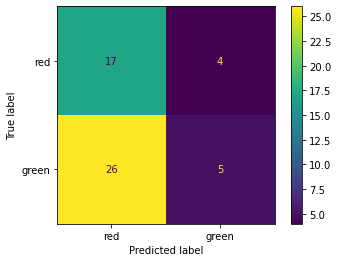

Recall -> 16.13 %
Sensitivity -> 80.95 %


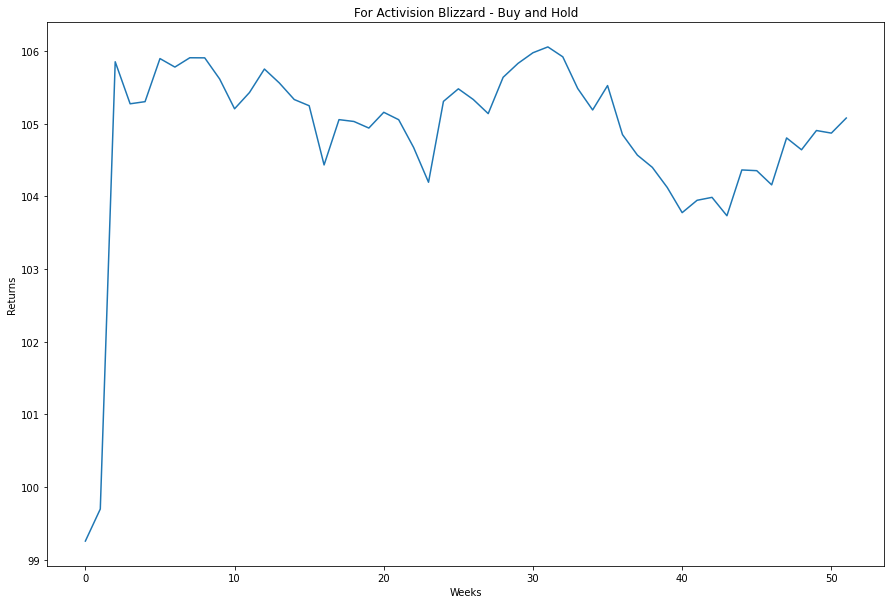

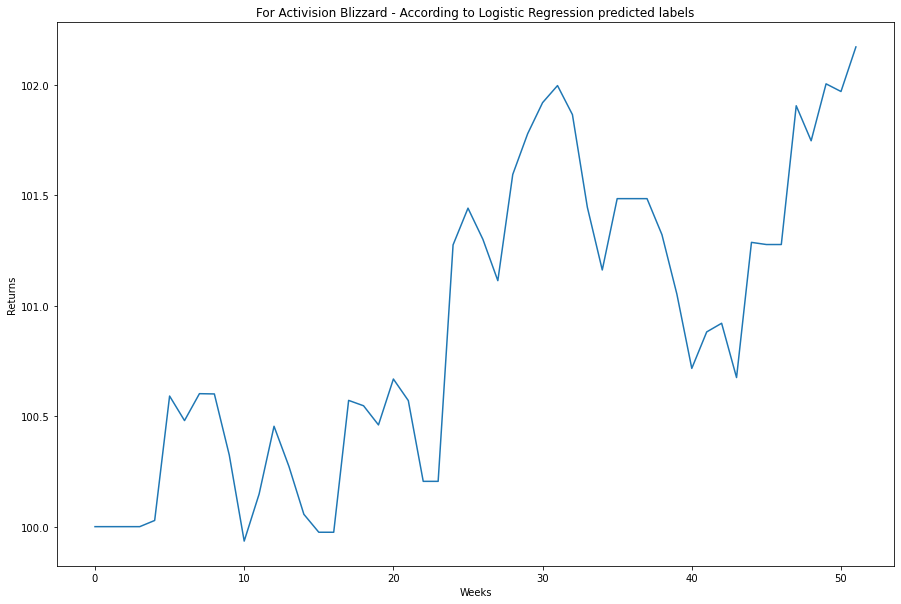

Final Amount for BnH -> 105.08
Final Amount for Logistic Regresion -> 102.17

For S&P 500
Equation for Logistic Regression -> (-0.15820491020339644)*mean_returns + (-0.4060094291942238)*volatility
Accuracy -> 38.46 %
Confusion Matrix ->
[[18  0]
 [32  2]]


<Figure size 1080x720 with 0 Axes>

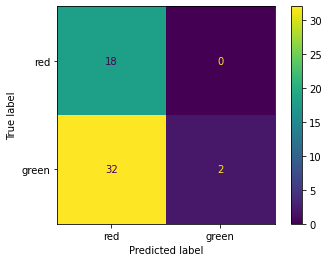

Recall -> 5.88 %
Sensitivity -> 100.0 %


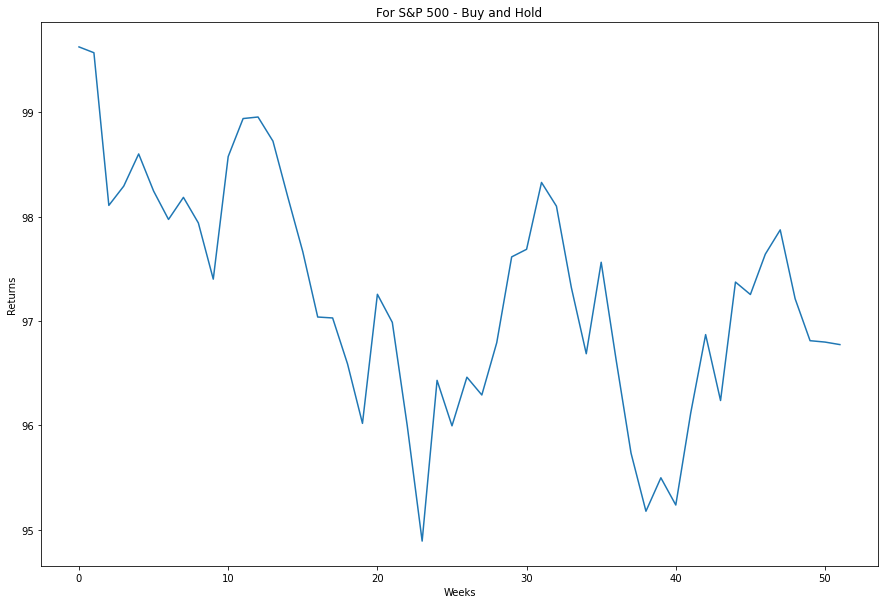

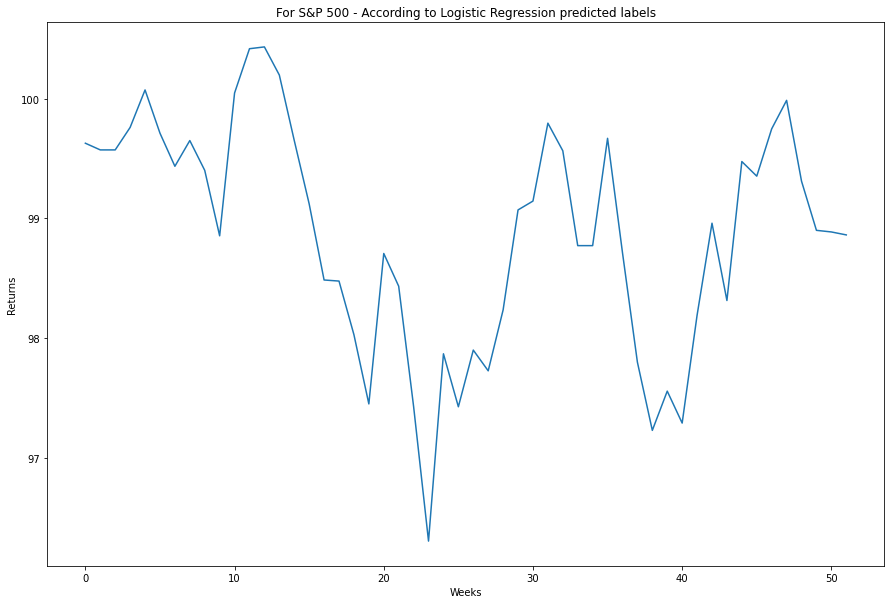

Final Amount for BnH -> 96.77
Final Amount for Logistic Regresion -> 98.86


In [10]:
def train_test_lr(df, stocks):
    print(f"\nFor {stocks}")
    df_yr1 = df[df["Year"] == 2021][["mean_return", "volatility"]]
    df_yr2 = df[df["Year"] == 2022][["mean_return", "volatility"]]
    df_yr1_label = df[df["Year"] == 2021]["Label"]
    df_yr2_label = df[df["Year"] == 2022]["Label"]
    
    ss = StandardScaler()
    log_r = LogisticRegression()
    ss.fit(df_yr1)
    df_yr1_trans = ss.transform(df_yr1)
    log_r.fit(df_yr1_trans, df_yr1_label)
    print(f"Equation for Logistic Regression -> ({log_r.coef_[0][0]})*mean_returns + ({log_r.coef_[0][1]})*volatility")
    df_yr2_trans = ss.transform(df_yr2)
    df_yr2_pred = log_r.predict(df_yr2_trans)
    accuracy = round(accuracy_score(df_yr2_label, df_yr2_pred)*100, 2)
    print(f"Accuracy -> {accuracy} %")
    conf_matrix = confusion_matrix(df_yr2_label, df_yr2_pred)
    print("Confusion Matrix ->")
    print(conf_matrix)
    
    plt.figure(figsize=(15, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                            display_labels=["red", "green"])
    disp.plot()
    plt.show()
    
    tn = conf_matrix[0][0]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    fp = conf_matrix[0][1]
    tpr = round((tp/(tp + fn))*100, 2)
    tnr = round((tn/(tn + fp))*100, 2)
    print(f"Recall -> {tpr} %")
    print(f"Sensitivity -> {tnr} %")
    
    i1, i2 = 100, 100
    bnh = []
    trade_logr = []
    df_yr2_ret = np.array(df_yr2["mean_return"])
    for i in range(df_yr2_pred.shape[0]):
        i1 = i1*(1 + df_yr2_ret[i]/100)
        if df_yr2_pred[i] == "green":
            i2 = i2*(1 + df_yr2_ret[i]/100)
        bnh.append(i1)
        trade_logr.append(i2)

    plt.figure(figsize=(15, 10))
    plt.plot(bnh)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - Buy and Hold")
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.plot(trade_logr)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - According to Logistic Regression predicted labels")
    plt.show()
    
    print(f"Final Amount for BnH -> {round(i1, 2)}")
    print(f"Final Amount for Logistic Regresion -> {round(i2, 2)}")

train_test_lr(df_atvi, "Activision Blizzard")
train_test_lr(df_spy, "S&P 500")